In [2]:
import math
from logging import debug

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import copy
from math import sqrt,ceil
from scipy.stats import linregress
import libraries as lib

In [3]:
directory = "../../../OneDrive - HvA/Logfiles/SOLAR/2024/20240707_20240715_terugvaart/20240713_Huy-Limburg/0026 - 20240713T080342 14h37m16s 145.044km Durnal - Heel"
result1 = lib.DataUitzoekenGui(directory)

SelectMultiple(description='Bestanden:', options=('0_Bus.csv', '2_MPPT_0_05_05.csv', '3_MPPT_1_05_07.csv', '4_…

Button(button_style='success', description='Bestanden Laden', icon='check', style=ButtonStyle(), tooltip='Klik…

Label(value='')

In [5]:
# Na het laden van de bestanden en het klikken op de knop
# Controleer of 'merged_df' in result zit
if 'merged_df' in result1:
    merged_df = result1['merged_df'].copy()
    # Gebruik merged_df zoals je wilt
else:
    print("De data is nog niet geladen.")
merged_df

,1_Datalogger port,"1_Dataloggertijd, in s",1_Cycle count,1_Tijd,1_Latitude,1_Longitude,1_Snelheid over de grond in km/h,1_Richting van de snelheid,1_Datum,1_Magnetische directie,...,2_CRC errors detected (0),2_Unknown packets (0),2_Number of times more or fewer fields than expected in a packet (0),2_gps long,2_gps lat,2_gps direction,2_gps speed,2_gps time,2_Datalogger port,2_Format header (>20|02)
Indextijd,,,,,,,,,,,,,,,,,,,,,
0 days 00:02:19,9.0,139.0348,143.630,60343.0,5020.2014,459.8611,0.0,9.7,130724.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:02:20,9.0,140.0466,144.642,60344.0,5020.2014,459.8611,0.0,9.7,130724.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:02:21,9.0,141.0361,145.631,60345.0,5020.2014,459.8611,0.0,9.7,130724.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:02:22,9.0,142.0393,146.635,60346.0,5020.2014,459.8611,0.0,9.7,130724.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:02:23,9.0,143.0548,147.651,60347.0,5020.2014,459.8611,0.0,9.7,130724.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 14:39:30,9.0,52770.1838,52782.637,204054.0,5110.7016,552.5635,0.0,286.3,130724.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 14:39:31,9.0,52771.1616,52783.613,204055.0,5110.7016,552.5635,0.0,286.3,130724.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 14:39:32,9.0,52772.2290,52784.684,204056.0,5110.7016,552.5635,0.0,286.3,130724.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#filter de data vanaf tijdstip 170000 tot 190000
merged_df1 = merged_df[merged_df['1_Tijd'] > 155000]
merged_df1 = merged_df1[merged_df1['1_Tijd'] < 190000]
#filter the data where snelheid over the grond or snelheid tenopzichte van het water is not 0 and snelheid ten opzichte van het water is lower then 20
merged_df1 = merged_df1[merged_df1['1_Snelheid over de grond in km/h'] != 0]
merged_df1 = merged_df1[merged_df1['1_Snelheid tenopzichte van het water in Kilometers per uur'] != 0]
merged_df1 = merged_df1[merged_df1['1_Snelheid tenopzichte van het water in Kilometers per uur'] < 20]

#merged_df1 = merged_df.iloc[0:-1]
lib.plot_trajectory_map(merged_df1['1_Latitude'].dropna(), merged_df1['1_Longitude'].dropna(), merged_df1['1_Tijd'].dropna())

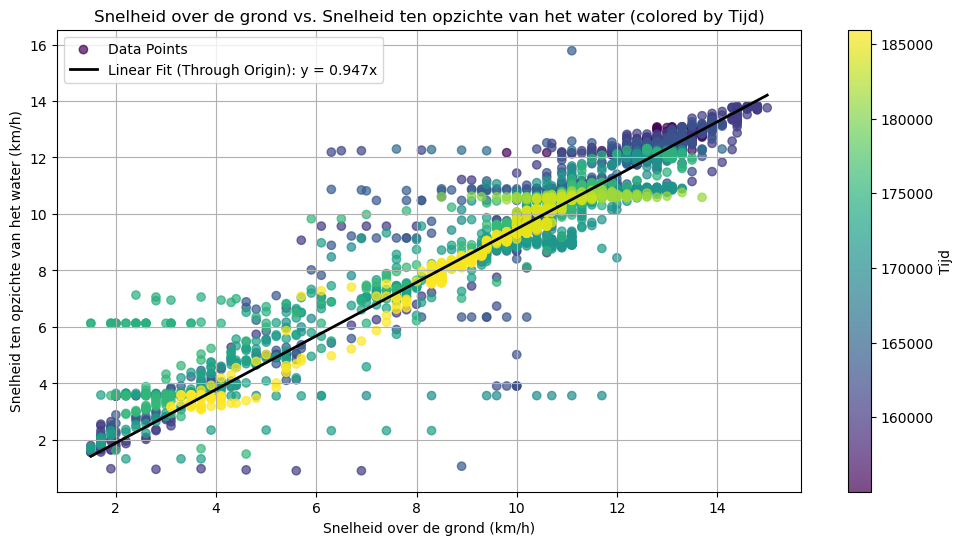

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Linear model for fitting through origin (intercept = 0)
def linear_model_through_origin(x, m):
    return m * x

# Function to plot speed over ground vs speed relative to water with time as color and linear fit through origin
def plot_speeds_with_time_2d(df):
    # Extract relevant columns
    speed_ground = df['1_Snelheid over de grond in km/h'].to_numpy()
    speed_water = df['1_Snelheid tenopzichte van het water in Kilometers per uur'].to_numpy()
    time = df['1_Tijd'].to_numpy()
    
    # Fit the linear model through the origin
    popt, _ = curve_fit(linear_model_through_origin, speed_ground, speed_water)
    m = popt[0]
    
    # Generate linear fit line that goes through the origin
    speed_ground_fit = np.linspace(min(speed_ground), max(speed_ground), 100)
    speed_water_fit = linear_model_through_origin(speed_ground_fit, m)
    
    # Create the scatter plot
    plt.figure(figsize=(12, 6))
    scatter = plt.scatter(speed_ground, speed_water, c=time, cmap='viridis', alpha=0.7, label='Data Points')
    
    # Add the linear fit line through the origin
    plt.plot(speed_ground_fit, speed_water_fit, color='black', linewidth=2,
             label=f'Linear Fit (Through Origin): y = {m:.3f}x')
    
    # Color bar for time
    cbar = plt.colorbar(scatter)
    cbar.set_label('Tijd')
    
    # Set axis labels and title
    plt.xlabel('Snelheid over de grond (km/h)')
    plt.ylabel('Snelheid ten opzichte van het water (km/h)')
    plt.title('Snelheid over de grond vs. Snelheid ten opzichte van het water (colored by Tijd)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the plotting function with the filtered dataset
plot_speeds_with_time_2d(merged_df1)


In [8]:
merged_df1

,1_Datalogger port,"1_Dataloggertijd, in s",1_Cycle count,1_Tijd,1_Latitude,1_Longitude,1_Snelheid over de grond in km/h,1_Richting van de snelheid,1_Datum,1_Magnetische directie,...,2_CRC errors detected (0),2_Unknown packets (0),2_Number of times more or fewer fields than expected in a packet (0),2_gps long,2_gps lat,2_gps direction,2_gps speed,2_gps time,2_Datalogger port,2_Format header (>20|02)
Indextijd,,,,,,,,,,,,,,,,,,,,,
0 days 09:48:37,9.0,35317.2144,35327.063,155001.0,5052.9940,542.4185,12.8,27.5,130724.0,NaN,...,0.0,0.0,542.41724,5052.99247,25.80,12.98,155000.0,NaN,B,20|02
0 days 09:48:38,9.0,35318.2766,35328.121,155002.0,5052.9961,542.4187,13.0,26.3,130724.0,NaN,...,0.0,0.0,542.41850,5052.99400,27.50,12.80,155001.0,NaN,B,20|02
0 days 09:48:39,9.0,35319.2121,35329.063,155003.0,5052.9980,542.4202,12.4,28.6,130724.0,NaN,...,0.0,0.0,542.41870,5052.99610,26.30,13.00,155002.0,NaN,B,20|02
0 days 09:48:40,9.0,35320.2139,35330.063,155004.0,5052.9997,542.4215,12.8,26.6,130724.0,NaN,...,0.0,0.0,542.42046,5052.99834,28.20,12.48,155003.2,NaN,B,20|02
0 days 09:48:41,9.0,35321.2630,35331.113,155005.0,5053.0014,542.4223,12.8,26.3,130724.0,NaN,...,0.0,0.0,542.42158,5052.99987,26.57,12.80,155004.1,NaN,B,20|02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 12:58:31,9.0,46711.1964,46722.746,185955.0,5108.3582,552.4918,7.8,25.7,130724.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
0 days 12:58:32,9.0,46712.2224,46723.770,185956.0,5108.3593,552.4922,7.6,25.4,130724.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
0 days 12:58:33,9.0,46713.1964,46724.742,185957.0,5108.3602,552.4931,7.6,25.4,130724.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None


In [9]:
directory = "../../../OneDrive - HvA/Logfiles/SOLAR/2024/20240707_20240715_terugvaart/20240713_Huy-Limburg/0026 - 20240713T080342 14h37m16s 145.044km Durnal - Heel"
result1 = lib.DataUitzoekenGui(directory)
# Na het laden van de bestanden en het klikken op de knop
# Controleer of 'merged_df' in result zit
if 'merged_df' in result1:
    merged_df = result1['merged_df'].copy()
    # Gebruik merged_df zoals je wilt
else:
    print("De data is nog niet geladen.")
merged_df

SelectMultiple(description='Bestanden:', options=('0_Bus.csv', '2_MPPT_0_05_05.csv', '3_MPPT_1_05_07.csv', '4_…

Button(button_style='success', description='Bestanden Laden', icon='check', style=ButtonStyle(), tooltip='Klik…

Label(value='')

De data is nog niet geladen.


,1_Datalogger port,"1_Dataloggertijd, in s",1_Cycle count,1_Tijd,1_Latitude,1_Longitude,1_Snelheid over de grond in km/h,1_Richting van de snelheid,1_Datum,1_Magnetische directie,...,2_CRC errors detected (0),2_Unknown packets (0),2_Number of times more or fewer fields than expected in a packet (0),2_gps long,2_gps lat,2_gps direction,2_gps speed,2_gps time,2_Datalogger port,2_Format header (>20|02)
Indextijd,,,,,,,,,,,,,,,,,,,,,
0 days 00:02:19,9.0,139.0348,143.630,60343.0,5020.2014,459.8611,0.0,9.7,130724.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:02:20,9.0,140.0466,144.642,60344.0,5020.2014,459.8611,0.0,9.7,130724.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:02:21,9.0,141.0361,145.631,60345.0,5020.2014,459.8611,0.0,9.7,130724.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:02:22,9.0,142.0393,146.635,60346.0,5020.2014,459.8611,0.0,9.7,130724.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:02:23,9.0,143.0548,147.651,60347.0,5020.2014,459.8611,0.0,9.7,130724.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 14:39:30,9.0,52770.1838,52782.637,204054.0,5110.7016,552.5635,0.0,286.3,130724.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 14:39:31,9.0,52771.1616,52783.613,204055.0,5110.7016,552.5635,0.0,286.3,130724.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 14:39:32,9.0,52772.2290,52784.684,204056.0,5110.7016,552.5635,0.0,286.3,130724.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Zelfde voor de sleeptest proef in het Alkmaardersmeer

In [17]:
# Define each directory for the required paths with updated paths
directory2 = "../../../OneDrive - HvA/Logfiles/SOLAR/2024/2024-10-24_sleeptest/0056 - 20241024T115530 1h25m5s 12.315km De Rijp - Uitgeest - De Rijp"
# Process each directory with lib.DataUitzoekenGui
result2 = lib.DataUitzoekenGui(directory2)

SelectMultiple(description='Bestanden:', options=('0_Bus.csv', '1_Master_08_05.csv', '2_MPPT_0_05_05.csv', '3_…

Button(button_style='success', description='Bestanden Laden', icon='check', style=ButtonStyle(), tooltip='Klik…

Label(value='')

In [22]:
# After loading the files and clicking the button, check for 'merged_df' in each result
if 'merged_df' in result2:
    print("Data for result2 has been loaded.")
    # Use merged_df2 as needed
else:
    print("Data for result2 has not been loaded.")
result2

Data for result2 has been loaded.


{'merged_df':                  1_Datalogger port  1_Dataloggertijd, in s  1_Cycle count  \
 Indextijd                                                                   
 0 days 00:02:19                NaN                     NaN            NaN   
 0 days 00:02:20                9.0                140.4098        145.861   
 0 days 00:02:21                9.0                141.4102        146.860   
 0 days 00:02:22                9.0                142.4364        147.886   
 0 days 00:02:23                9.0                143.4079        148.859   
 ...                            ...                     ...            ...   
 0 days 01:27:32                NaN                     NaN            NaN   
 0 days 01:27:33                NaN                     NaN            NaN   
 0 days 01:27:34                NaN                     NaN            NaN   
 0 days 01:27:35                NaN                     NaN            NaN   
 0 days 01:27:36                NaN                

In [21]:
#filter de data vanaf tijdstip 170000 tot 190000
merged_df2 = merged_df[merged_df['1_Tijd'] > 0]
merged_df2 = merged_df1[merged_df1['1_Tijd'] < 0]
#filter the data where snelheid over the grond or snelheid tenopzichte van het water is not 0 and snelheid ten opzichte van het water is lower then 20
merged_df1 = merged_df1[merged_df1['1_Snelheid over de grond in km/h'] != 0]
merged_df1 = merged_df1[merged_df1['1_Snelheid tenopzichte van het water in Kilometers per uur'] != 0]
merged_df1 = merged_df1[merged_df1['1_Snelheid tenopzichte van het water in Kilometers per uur'] < 20]

#merged_df1 = merged_df.iloc[0:-1]
lib.plot_trajectory_map(merged_df1['1_Latitude'].dropna(), merged_df1['1_Longitude'].dropna(), merged_df1['1_Tijd'].dropna())